Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

load the dataset

In [ ]:
data = pd.read_csv("/content/Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


Analyse the data

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


Drop the serial no column

In [ ]:
data.drop("Serial No.",axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Checking for null value

In [ ]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Getting information about the data frame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


Stasistical summary of the dataframe

In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


To find the correlation of the column

In [ ]:
corr_matrix=data.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


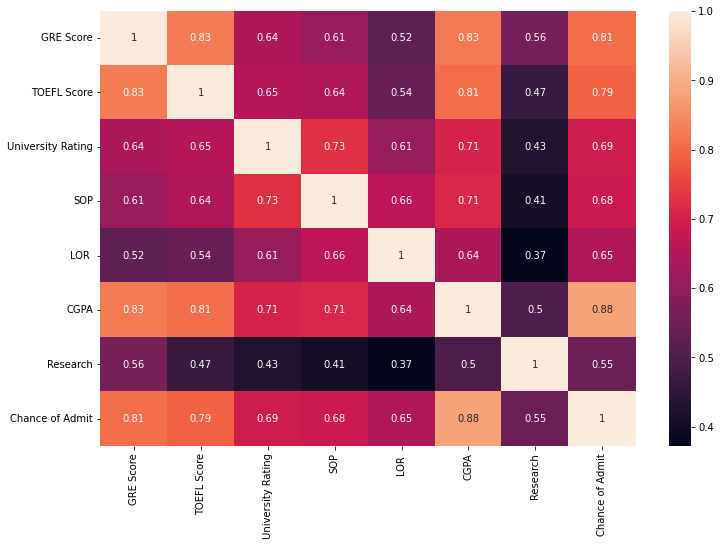

In [ ]:
#plotting the correlation matrix as a heatmap
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

Data visuvalization UNIVARINT ANALYSIS

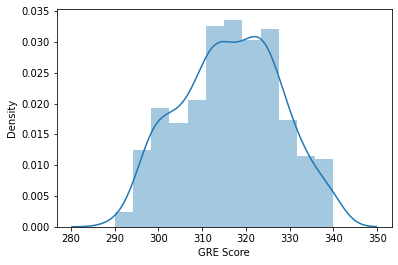

In [ ]:
sns.distplot(data["GRE Score"])

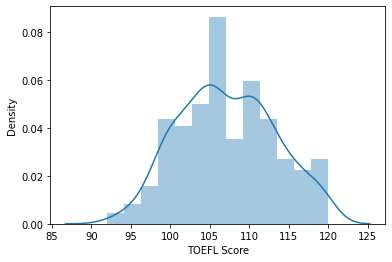

In [ ]:
sns.distplot(data["TOEFL Score"])

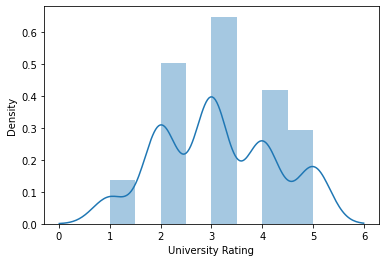

In [ ]:
sns.distplot(data["University Rating"])

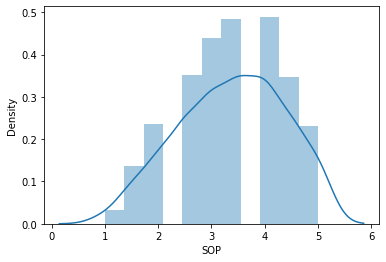

In [ ]:
sns.distplot(data["SOP"])

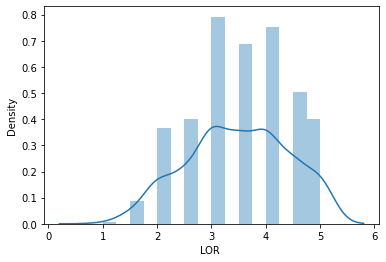

In [ ]:
sns.distplot(data["LOR "])

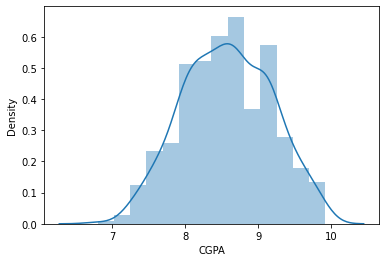

In [ ]:
sns.distplot(data["CGPA"])

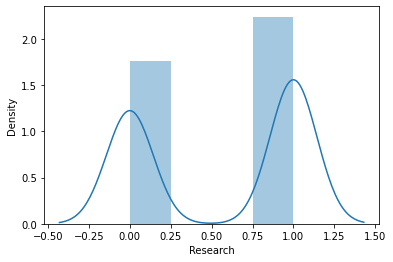

In [ ]:
sns.distplot(data["Research"])

BIVARIENT ANALYSIS

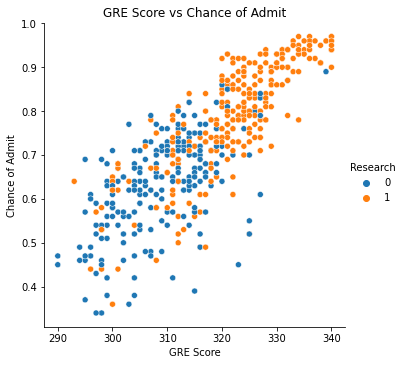

In [ ]:
sns.relplot(data=data,x="GRE Score",y="Chance of Admit",hue="Research")
plt.title("GRE Score vs Chance of Admit")
plt.show()

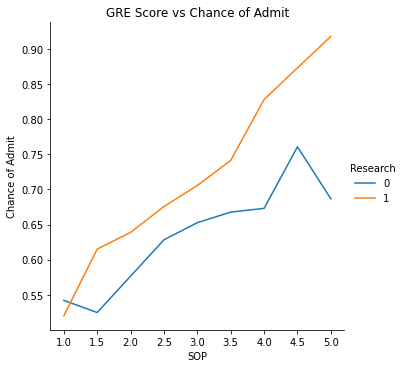

In [ ]:
sns.relplot(data=data,x="SOP",y="Chance of Admit",hue="Research",kind="line",ci=None)
plt.title("GRE Score vs Chance of Admit")
plt.show()

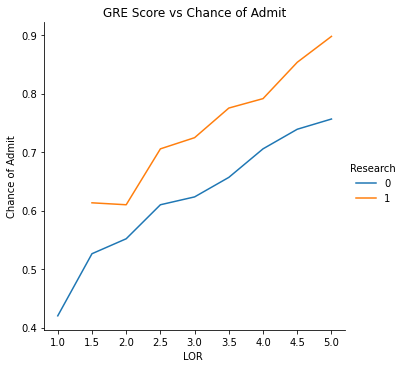

In [ ]:
sns.relplot(data=data,x="LOR ",y="Chance of Admit",hue="Research",kind="line",ci=None)
plt.title("GRE Score vs Chance of Admit")
plt.show()

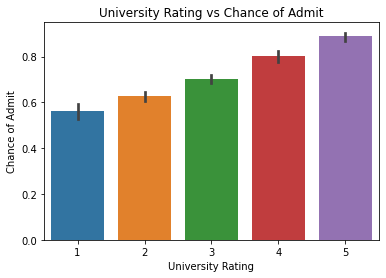

In [ ]:
sns.barplot(data=data,x="University Rating",y="Chance of Admit")
plt.title("University Rating vs Chance of Admit")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1baa43f190>,
      dtype=object)

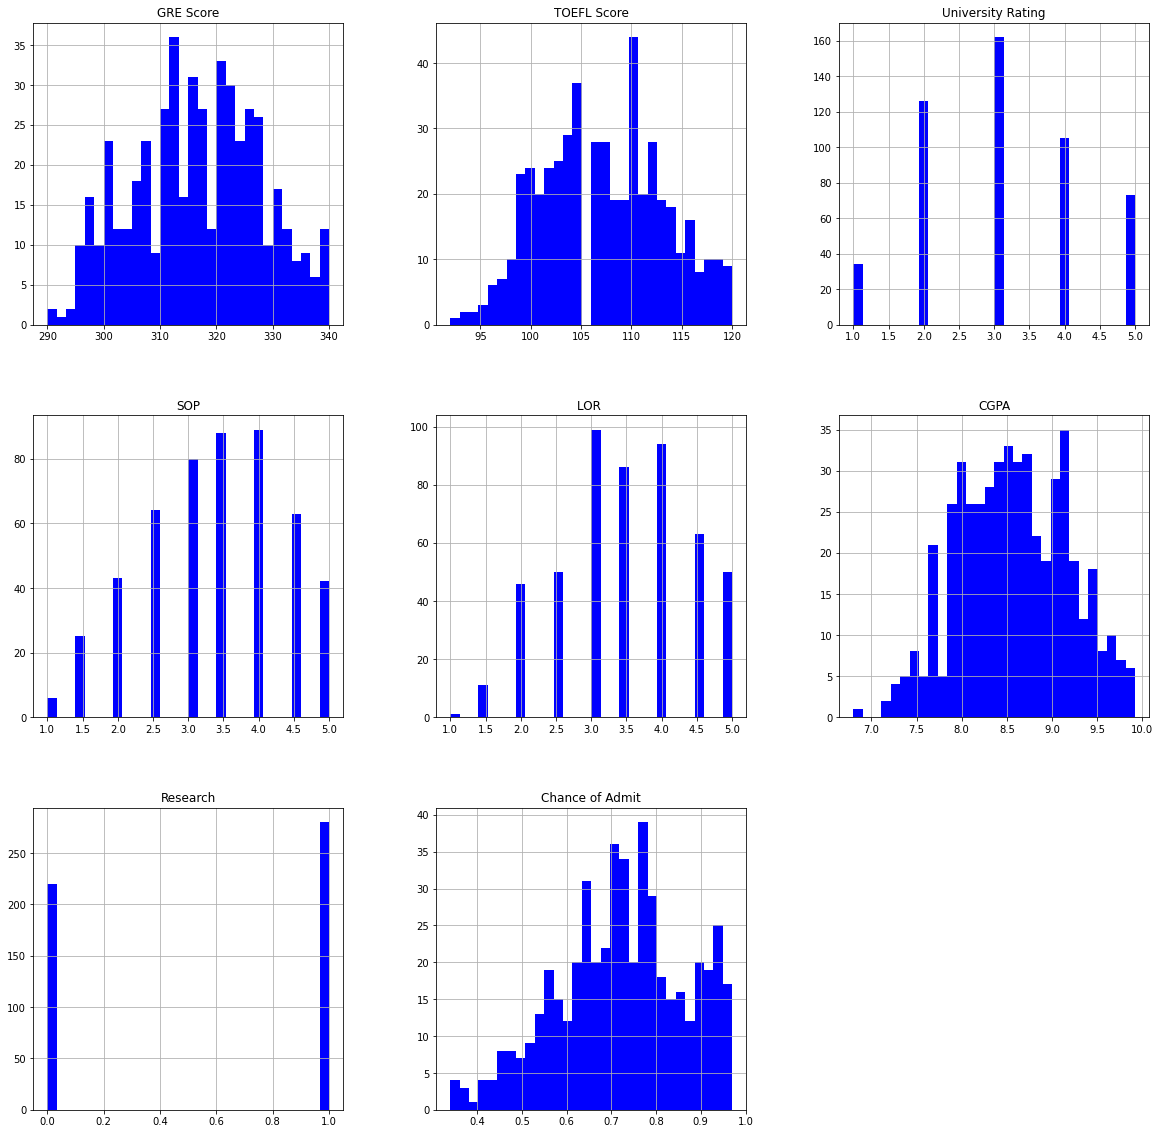

In [ ]:
data.hist(bins = 30, figsize = (20,20), color = 'blue')

Importing the required libraries for regression model 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Splitting the data set into dependent and independent column

In [ ]:
x = data[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]]
y = data["Chance of Admit"]
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [ ]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

Spliting the dataset into training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

Multiple lenear regression

In [ ]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Multiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Multiple Linear Regression's Score = 0.809


Random forset regression

In [ ]:
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=1)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.767


Conclusion

In [ ]:
import pickle
pickle.dump(multiple_lin_reg,open("model.pkl","wb"))